# **Implementation of ANN in Keras**

In [192]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [193]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [194]:
print(f"Tensorflow Varsion {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Varsion 2.17.0
Keras Version 3.4.1


In [195]:
check_list = ['CPU', 'GPU']

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available!")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available!")

CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [196]:
df = pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [197]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [198]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [199]:
df['quality_encoded'] = df['quality'].map({'good': 1, 'bad': 0})

In [200]:
df.shape

(1599, 13)

In [201]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0


In [202]:
df.drop(labels='quality', axis=1, inplace=True)


<Axes: >

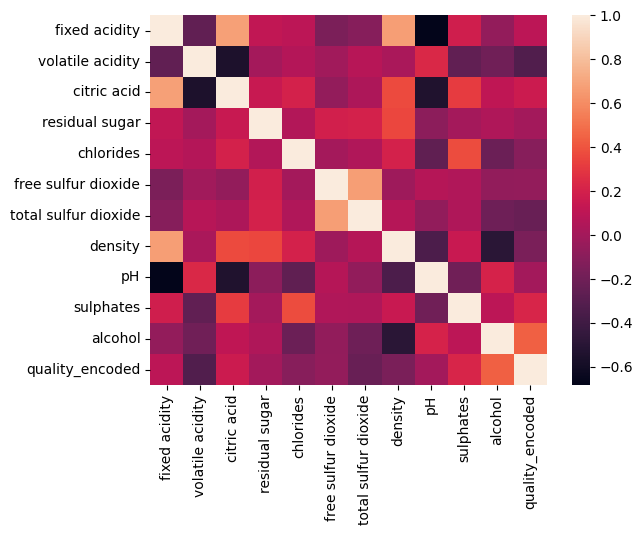

In [203]:
sns.heatmap(data=df.corr())

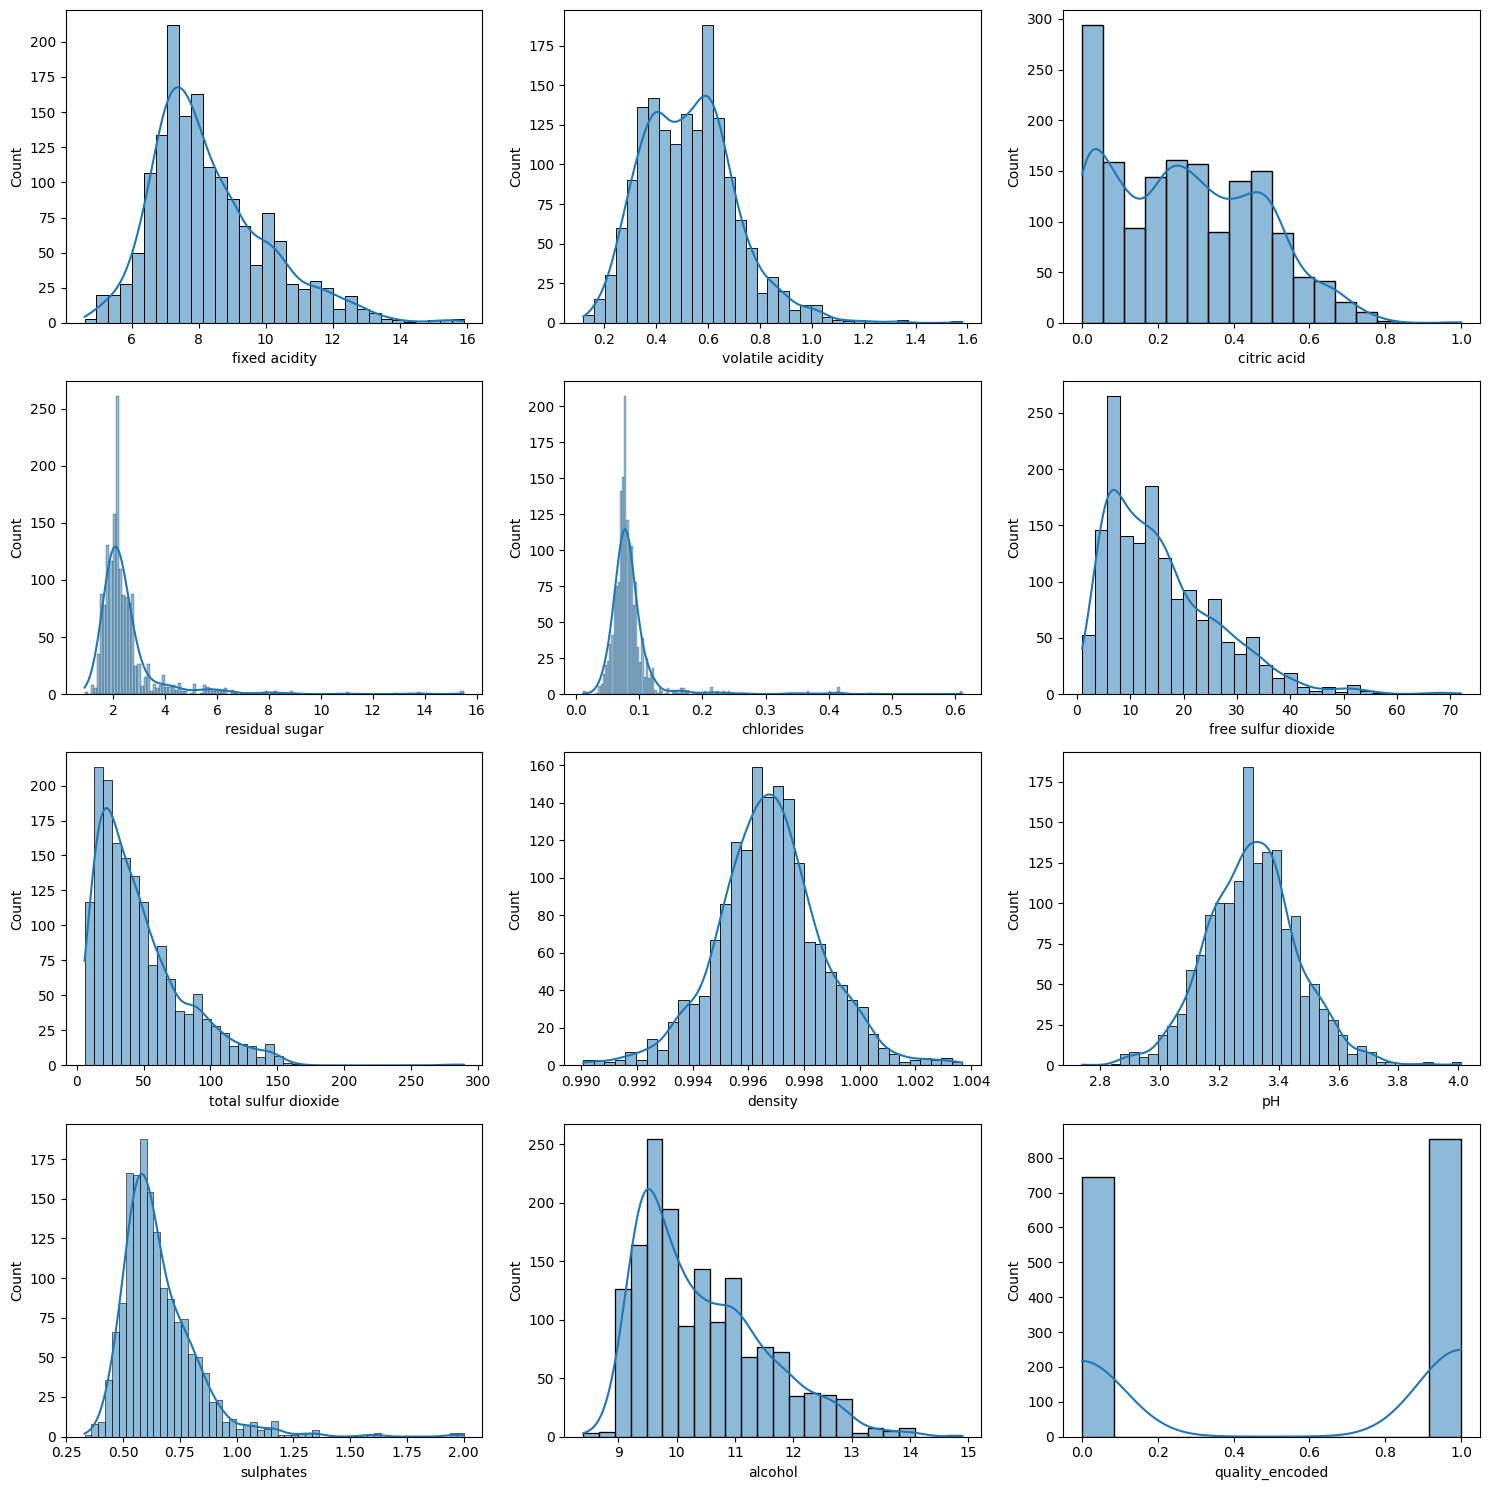

In [204]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, feature in enumerate(df):  # Exclude 'quality' for now
    sns.histplot(df[feature], kde=True, ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

In [205]:
X = df.iloc[:, :-1]

In [206]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [207]:
y = df.iloc[:, -1]

In [208]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality_encoded, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [210]:
X_train_full.shape

(1279, 11)

In [211]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [212]:
X_train.shape

(1023, 11)

In [213]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)



In [214]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(1023, 11)
(256, 11)
(1023,)
(256,)


In [215]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[11,], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/home/karan/virtual_envs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [216]:
LOSS_FUNCTION = tf.keras.losses.BinaryCrossentropy() # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.Adam() # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [217]:
import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2024_08_03_21_44_36


In [218]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [219]:
CKPT_path = "Model_ckpt.keras"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [220]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_val, y_val)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.6513 - loss: 0.6203 - val_accuracy: 0.7031 - val_loss: 0.5574
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7404 - loss: 0.5209 - val_accuracy: 0.7227 - val_loss: 0.5456
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7487 - loss: 0.4940 - val_accuracy: 0.7305 - val_loss: 0.5343
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7641 - loss: 0.4768 - val_accuracy: 0.7227 - val_loss: 0.5314
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7658 - loss: 0.4900 - val_accuracy: 0.7227 - val_loss: 0.5293
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7531 - loss: 0.4852 - val_accuracy: 0.7383 - val_loss: 0.5282
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7704 - loss: 0.4647 - val_accuracy: 0.7344 - val_loss: 0.5360
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7864 - loss: 0.4349 - val_accuracy: 0.7266 - v

In [235]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.8085 - loss: 0.4076 - val_accuracy: 0.7656 - val_loss: 0.5104
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7991 - loss: 0.4099 - val_accuracy: 0.7422 - val_loss: 0.5244
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8061 - loss: 0.3854 - val_accuracy: 0.7578 - val_loss: 0.5152
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8216 - loss: 0.3821 - val_accuracy: 0.7461 - val_loss: 0.5222
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8236 - loss: 0.3571 - val_accuracy: 0.7617 - val_loss: 0.5188


In [222]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [223]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2024_08_03_21_44_55_.h5 will be saved at TRAINED_MODEL/Model_2024_08_03_21_44_55_.h5


'TRAINED_MODEL/Model_2024_08_03_21_44_55_.h5'

In [224]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [225]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 32}

In [226]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.813294,0.398050,0.757812,0.504901
1,0.812317,0.389287,0.746094,0.511826
2,0.827957,0.382025,0.750000,0.516440
3,0.832845,0.376690,0.746094,0.527181
4,0.819159,0.387929,0.746094,0.545834


<Axes: >

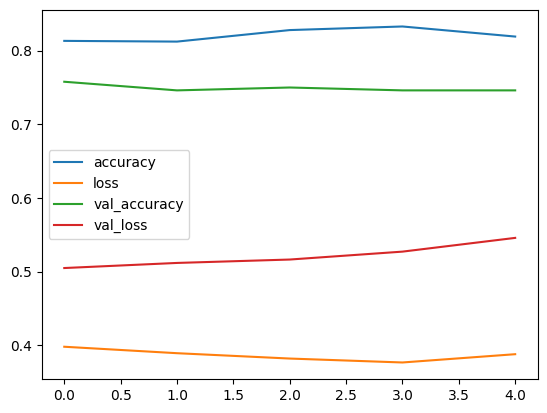

In [227]:
pd.DataFrame(history.history).plot()

In [228]:
model_clf.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7658 - loss: 0.4936 


[0.4818226397037506, 0.78125]

In [229]:
x_new = X_test[:3]

In [230]:
actual = y_test[:3]
actual

1147    1
659     0
871     0
Name: quality_encoded, dtype: int64

In [231]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


array([[0.864],
       [0.296],
       [0.812]], dtype=float32)

In [232]:
y_pred = np.argmax(y_prob, axis = -1)

In [233]:
y_pred

array([0, 0, 0])

In [234]:
actual

1147    1
659     0
871     0
Name: quality_encoded, dtype: int64